<a href="https://colab.research.google.com/github/SJhawar1010/Deep-Learning/blob/main/2348554_DL_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
def revenue_function(w):
    return (0.5 * (w**2)) - (30 * w) + 100

def gradient(w):
    return w - 30

def momentum_optimization(learning_rate, momentum, w_init, iterations):
    w_values = []
    revenue_values = []
    w = w_init
    v = 0  # Momentum initialization

    for i in range(iterations):
        grad = gradient(w)
        v = momentum * v - learning_rate * grad
        w = w + v

        w_values.append(w)
        revenue_values.append(revenue_function(w))

        print(f"Iteration {i+1}: Price = {w:.2f}, Revenue = {revenue_function(w):.2f}")

    return w_values, revenue_values

In [79]:
initial_price = 20
learning_rate = 0.1
momentum = 0.9
num_iterations = 3

In [80]:
w_values, revenue_values = momentum_optimization(learning_rate, momentum, initial_price, num_iterations)

Iteration 1: Price = 21.00, Revenue = -309.50
Iteration 2: Price = 22.80, Revenue = -324.08
Iteration 3: Price = 25.14, Revenue = -338.19


In [81]:
optimal_price = w_values[-1]
print(f"\nOptimal Price after {num_iterations} iterations: {optimal_price:.2f}")


Optimal Price after 3 iterations: 25.14


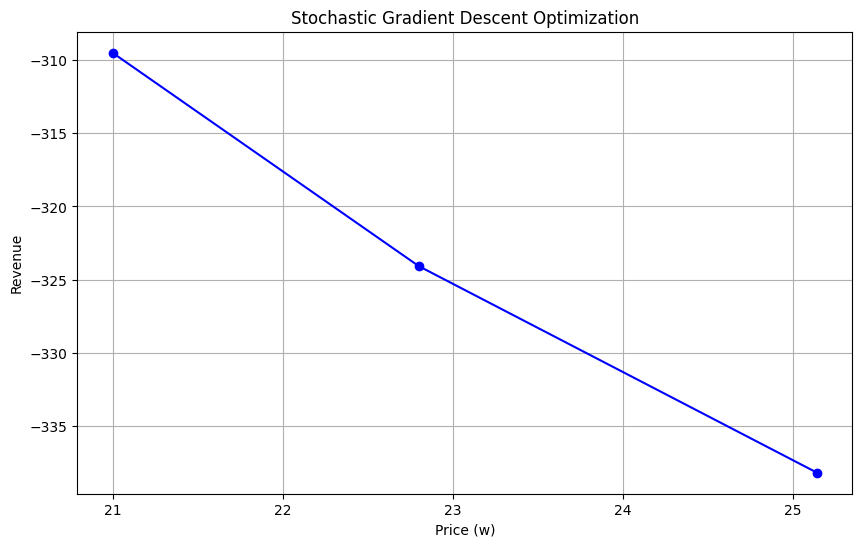

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(w_values, revenue_values, marker='o', linestyle='-', color='b')
plt.title('Stochastic Gradient Descent Optimization')
plt.xlabel('Price (w)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [85]:
data = pd.read_csv("/content/drive/MyDrive/DL Datasets/heart.csv")

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age : age of the patient [years]

Sex : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP : resting blood pressure [mm Hg]

Cholesterol : serum cholesterol [mm/dl]

FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina : exercise-induced angina [Y: Yes, N: No]

Oldpeak : oldpeak = ST [Numeric value measured in depression]

ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease : output class [1: heart disease, 0: Normal]

In [87]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [88]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [89]:
data.shape

(918, 12)

In [90]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [91]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

ASY: 496
NAP: 203
ATA: 173
TA: 46


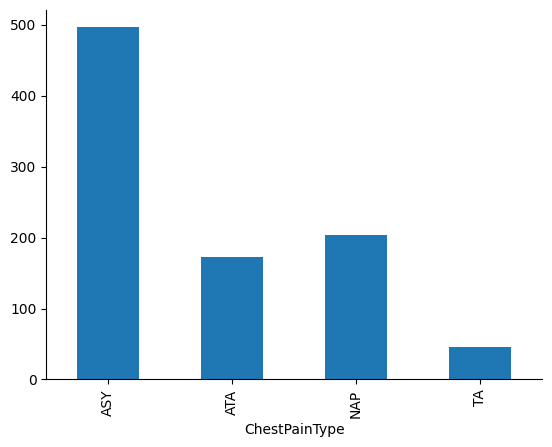

In [92]:
CPT_Count = data['ChestPainType'].value_counts()
data.groupby('ChestPainType').size().plot(kind='bar')
plt.gca().spines[['top', 'right',]].set_visible(False)
for channel, count in zip(CPT_Count.index, CPT_Count):
    print(f'{channel}: {count}')

In [93]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['FastingBS'] = label_encoder.fit_transform(data['FastingBS'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])

In [94]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
def build_model(regularizer):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=regularizer))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [97]:
l1_model = build_model(regularizers.l1(0.01))
l2_model = build_model(regularizers.l2(0.01))
elastic_net_model = build_model(regularizers.l1_l2(l1=0.01, l2=0.01))

In [98]:
def train_model(model, X_train, y_train):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    return history

l1_history = train_model(l1_model, X_train_scaled, y_train)
l2_history = train_model(l2_model, X_train_scaled, y_train)
elastic_net_history = train_model(elastic_net_model, X_train_scaled, y_train)

In [99]:
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    auc_score = auc(fpr, tpr)

    return acc, precision, recall, f1, cm, fpr, tpr, auc_score

l1_metrics = evaluate_model(l1_model, X_test_scaled, y_test)
l2_metrics = evaluate_model(l2_model, X_test_scaled, y_test)
elastic_net_metrics = evaluate_model(elastic_net_model, X_test_scaled, y_test)

9/9 [==============================] - 0s 2ms/step


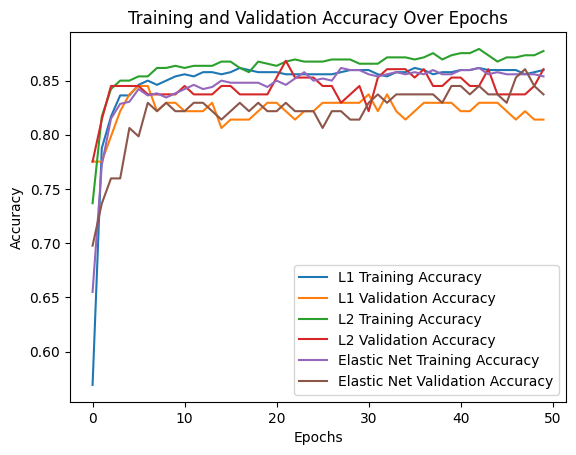

In [100]:
plt.plot(l1_history.history['accuracy'], label='L1 Training Accuracy')
plt.plot(l1_history.history['val_accuracy'], label='L1 Validation Accuracy')
plt.plot(l2_history.history['accuracy'], label='L2 Training Accuracy')
plt.plot(l2_history.history['val_accuracy'], label='L2 Validation Accuracy')
plt.plot(elastic_net_history.history['accuracy'], label='Elastic Net Training Accuracy')
plt.plot(elastic_net_history.history['val_accuracy'], label='Elastic Net Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ['Normal', 'Heart Disease']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

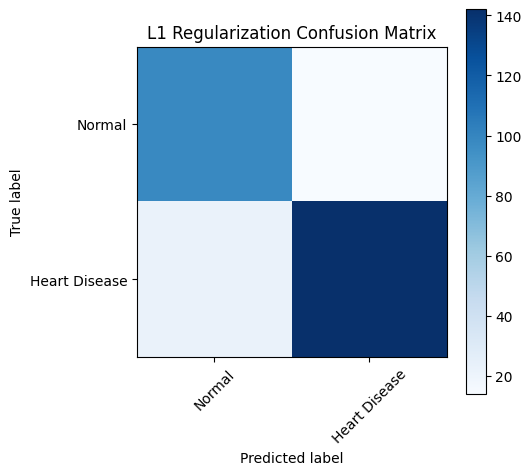

In [102]:
plot_confusion_matrix(l1_metrics[4], 'L1 Regularization Confusion Matrix')

In [103]:
print("L1 Regularization Metrics:")
print(f"Accuracy: {l1_metrics[0]:.4f}")
print(f"Precision: {l1_metrics[1]:.4f}")
print(f"Recall: {l1_metrics[2]:.4f}")
print(f"F1-Score: {l1_metrics[3]:.4f}")

L1 Regularization Metrics:
Accuracy: 0.8696
Precision: 0.9103
Recall: 0.8659
F1-Score: 0.8875


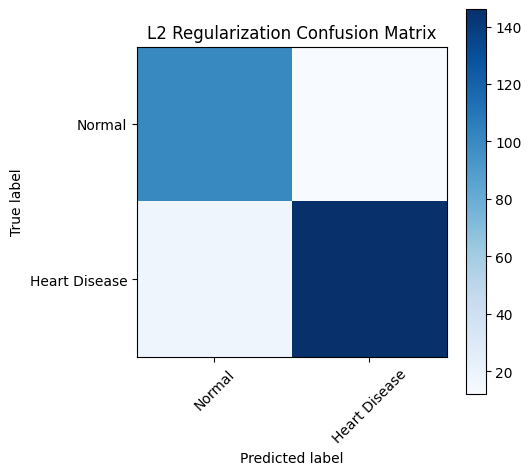

In [104]:
plot_confusion_matrix(l2_metrics[4], 'L2 Regularization Confusion Matrix')

In [105]:
print("\nL2 Regularization Metrics:")
print(f"Accuracy: {l2_metrics[0]:.4f}")
print(f"Precision: {l2_metrics[1]:.4f}")
print(f"Recall: {l2_metrics[2]:.4f}")
print(f"F1-Score: {l2_metrics[3]:.4f}")


L2 Regularization Metrics:
Accuracy: 0.8913
Precision: 0.9241
Recall: 0.8902
F1-Score: 0.9068


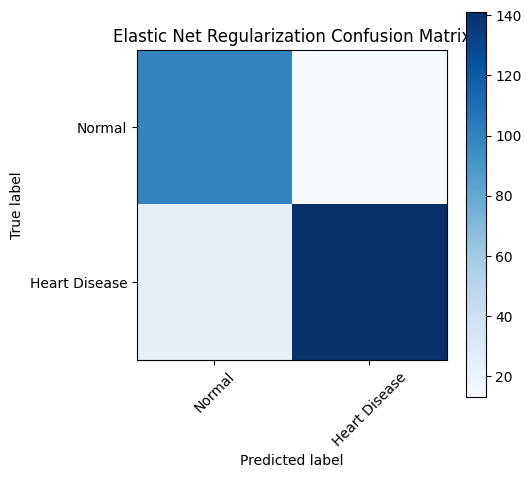

In [106]:
plot_confusion_matrix(elastic_net_metrics[4], 'Elastic Net Regularization Confusion Matrix')

In [107]:
print("\nElastic Net Regularization Metrics:")
print(f"Accuracy: {elastic_net_metrics[0]:.4f}")
print(f"Precision: {elastic_net_metrics[1]:.4f}")
print(f"Recall: {elastic_net_metrics[2]:.4f}")
print(f"F1-Score: {elastic_net_metrics[3]:.4f}")


Elastic Net Regularization Metrics:
Accuracy: 0.8696
Precision: 0.9156
Recall: 0.8598
F1-Score: 0.8868


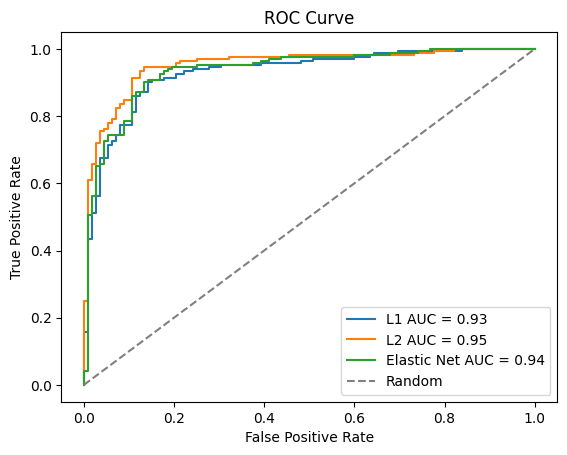

In [108]:
plt.plot(l1_metrics[5], l1_metrics[6], label=f'L1 AUC = {l1_metrics[7]:.2f}')
plt.plot(l2_metrics[5], l2_metrics[6], label=f'L2 AUC = {l2_metrics[7]:.2f}')
plt.plot(elastic_net_metrics[5], elastic_net_metrics[6], label=f'Elastic Net AUC = {elastic_net_metrics[7]:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()